In [1]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

     |████████████████████████████████| 1.4MB 5.9MB/s 
     |████████████████████████████████| 4.3MB 37.7MB/s 
     |████████████████████████████████| 296kB 43.5MB/s 
     |████████████████████████████████| 911kB 5.1MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7
     |████████████████████████████████| 2.8MB 4.0MB/s 
  Created wheel for Theano: filename=Theano-1.0.4-cp36-none-any.whl size=2667178 sha256=87e8632c48f380236836a4f67c263231c1614724226c8cc5bdad529774b3f8fb
  Stored in directory: /root/.cache/pip/wheels/88/fb/be/483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built Theano
  Found existing installation: Theano 1.0.5
    Uninstalling Theano-1.0.5:
      Successfully uninstalled Theano-1.0.5


In [2]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
N = 10000

noise = np.random.normal(0.0, 0.2, N)
X = np.random.normal(1.0, 0.1, N)
obs_y = (1.5 * X) + 0.9 +noise

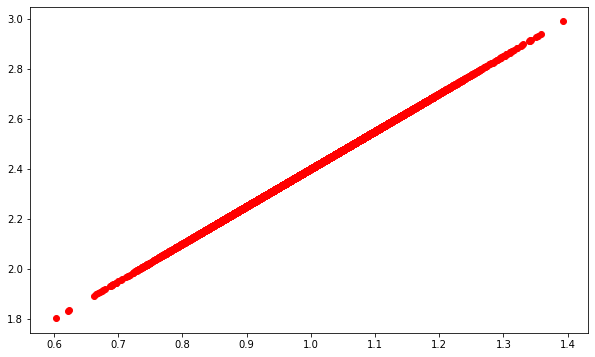

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X, obs_y-noise, c='r') 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, intercept, stdev]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:28<00:00, 89.23it/s]
The acceptance probability does not match the target. It is 0.9039172217133421, but should be close to 0.8. Try to increase the number of tuning steps.
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: 

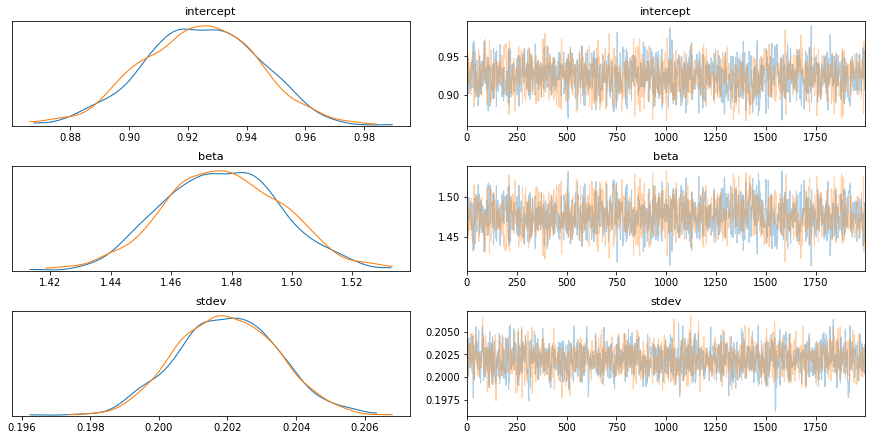

In [23]:
with pm.Model() as mymodel:

    stdev = pm.HalfNormal('stdev', sd=1.)
    intercept = pm.Normal('intercept', mu=0.0, sd=0.5)
    coeff = pm.Normal('beta', mu=0.5, sd=0.5)

    expected_value = (X * coeff) + intercept
    y = pm.Normal('y', mu=expected_value, sd=stdev, observed=obs_y)

    trace = pm.sample(2000)    # fit the data

    pm.traceplot((trace), ['intercept','beta','stdev']) # plot the trace
    plt.show()


In [24]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,0.924,0.020,0.889,0.962,0.001,0.0,1095.0,1095.0,1095.0,1491.0,1.0
beta,1.477,0.019,1.441,1.513,0.001,0.0,1091.0,1089.0,1090.0,1418.0,1.0
stdev,0.202,0.001,0.199,0.205,0.000,0.0,1834.0,1834.0,1838.0,1674.0,1.0


In [26]:
with mymodel:

    ppc= pm.sample_ppc(trace, samples= 1000) 

    # for each of values of X we will gey 1000 estimates slightly different due to uncertainty of the mean of the parameters.
    y_preds = ppc['y']
    print( "y_preds shape = ", ppc['y'].shape)

    # Same thing, but now using the expectation
    expected_y_pred = np.reshape(np.mean(y_preds, axis=0), [-1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [00:01<00:00, 544.56it/s]

y_preds shape =  (1000, 10000)


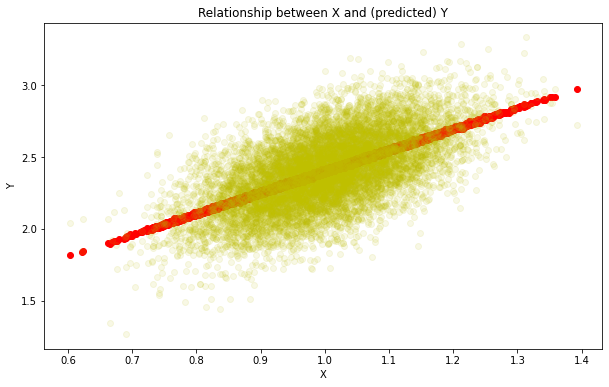

In [29]:

plt.figure(figsize=(10,6))
plt.scatter(X, expected_y_pred, c='r')    # estimates  of the Regression lines.
plt.scatter(X, obs_y, c='y', alpha=0.1)  # Yellow is the actual DATA 
plt.title("Relationship between X and (predicted) Y")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()